# [AI Innovation Square 릴레이 온라인 특강: 시각] 


## 4. CNN


In [ ]:
import tensorflow as tf

In [ ]:
res152 = tf.keras.applications.ResNet152() #학습된 모델

In [ ]:
res152.summary()

Model: "resnet152"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________


  - multi- input, output
      - Sequential 로 불가하여 Model 사용
  - connected to :어디로 연결 되었는지
  - conv - BN - Actiavtion

In [ ]:
inc=tf.keras.applications.InceptionV3()
inc.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________

2017년 부터는 실무적 테크닉
- 연산 줄이기

- 정확도
- 속도 
    - 레이어 적음

In [ ]:
vgg=tf.keras.applications.VGG16()
vgg.summary()

553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

### 이미지 분류
참고 :https://www.tensorflow.org/tutorials/images/classification
#### 기계학습 워크플로우
1. 데이터 검토 및 이해
    - EDA (특히 정형데이터)
    - image: OpenCV, PIL
    - 관리 구조: 모델 연동 방식이 달라짐
        - DB
        - directory
            - 각 클래스별로 폴더 생성
        - Pandas 테이블로 관리
        - tf.data.Dataset, numpy, hdf5
    
2. 입력 파이프라인 구축
3. 모델 구축
4. 훈련
5. 테스트
6. 개선

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.preprocessing.image_dataset_from_directory

<function tensorflow.python.keras.preprocessing.image_dataset.image_dataset_from_directory>

In [ ]:
tf.keras.preprocessing.image.ImageDataGenerator

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 4s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


- 흑백이미지
- 이미지 크기 상이

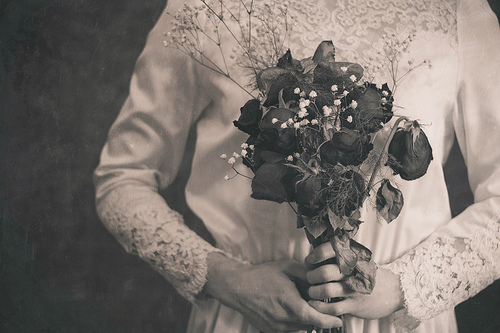

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0])) 

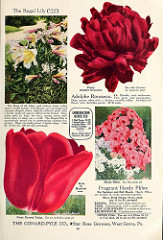

In [ ]:
PIL.Image.open(str(roses[1]))

resize 
- 전처리를 탐색을 통해 전략을 수립
  - PIL, Numpy ,Tensor
    - keras.preprocessing
    - 디스크의 이미지 디렉토리에서 tf.data.Dataset으로 바꾸어줌
    - 간단한 전처리
    - holdout


    

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


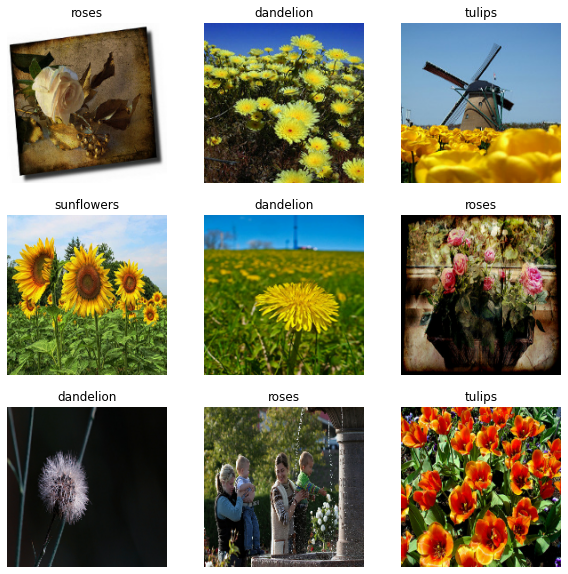

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


데이터
- 검증되야함
> - Garbage in garbage out

### tf.data pipeline 구축

-  AUTOTUNE 기능을 제공해서 효율적으로 오버헤드 처리
- CPU,GPU 자원을 자동으로 튜닝
- 병렬화
- 속도 향상
- `tf.data.experimental.AUTOTUNE`
  > -  scikit njobs= -1
- prefetch
- 한 번 학습한 데이터르 캐쉬 (메모리 사용)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#데이터 표준화 RGB채널 0~1사이값으로 표준
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
#함수형 패러다임 map (파이썬에서 기억나시죠?)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# iter 로 데이터 하나씩 봄 (Lazy Evaluation)
image_batch, labels_batch = next(iter(normalized_ds))

first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9891067


In [ ]:
#모델 간단하게 생성
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  # VGG kernel size 3
  layers.Conv2D(16, 3 , padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes) #softmax 사용하지 않고 from_logits
])

from_logits
- numerically stable 수치적으로 안정성 제공
- softmax를 안쓰는 테크닉 

> - 4.8 Numerical Stability and Initialization, Dive into Deep learning
- Duck-typing

- loss argument 3가지
  - string : 디폴트로 사용
  - class :옵션 기본값 변경
  - function : functional paradigm
    - 없는경우도 존재


In [ ]:
0.1+0.1+0.1 #값이 정확하게 나오지 않음

0.30000000000000004

In [ ]:
tf.keras.losses.SparseCategoricalCrossentropy() #객체
tf.keras.losses.sparse_categorical_crossentropy #function
'sparse_categorical_crossentropy' #string


'sparse_categorical_crossentropy'

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 64)        0

underfitting
- traing accuracy > 80%
- test accuracy < 70%

1. data augmentation


In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 89s 959ms/step - loss: 1.7053 - accuracy: 0.2949 - val_loss: 1.1124 - val_accuracy: 0.5232
Epoch 2/10
92/92 [==============================] - 83s 902ms/step - loss: 1.0479 - accuracy: 0.5927 - val_loss: 0.9452 - val_accuracy: 0.6172
Epoch 3/10
92/92 [==============================] - 83s 902ms/step - loss: 0.8614 - accuracy: 0.6726 - val_loss: 0.9445 - val_accuracy: 0.6104
Epoch 4/10
92/92 [==============================] - 83s 904ms/step - loss: 0.6875 - accuracy: 0.7464 - val_loss: 0.9072 - val_accuracy: 0.6417
Epoch 5/10
92/92 [==============================] - 83s 905ms/step - loss: 0.4713 - accuracy: 0.8377 - val_loss: 0.9731 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 83s 908ms/step - loss: 0.3313 - accuracy: 0.8833 - val_loss: 1.1646 - val_accuracy: 0.6267
Epoch 7/10
92/92 [==============================] - 84s 911ms/step - loss: 0.1690 - accuracy: 0.9459 - val_loss: 1.3337 - val_accuracy: 0.6390

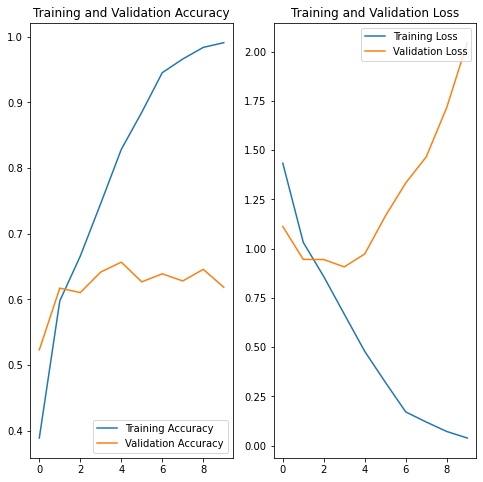

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

data augmentation
- 내부적으로 PIL사용
- CPU만 지원

In [ ]:
#좌우반전 , pooling 때문에 rotation 가능
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

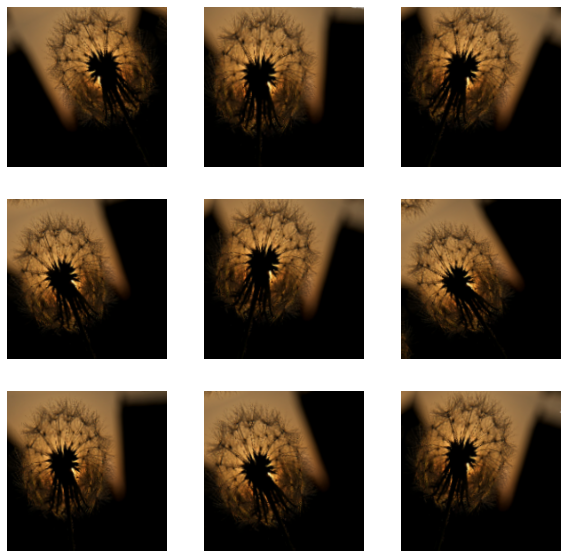

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 98s 1s/step - loss: 1.4359 - accuracy: 0.3835 - val_loss: 1.1570 - val_accuracy: 0.5450
Epoch 2/15
92/92 [==============================] - 97s 1s/step - loss: 1.0453 - accuracy: 0.5839 - val_loss: 0.9233 - val_accuracy: 0.6362
Epoch 3/15
92/92 [==============================] - 97s 1s/step - loss: 0.9299 - accuracy: 0.6375 - val_loss: 0.9063 - val_accuracy: 0.6526
Epoch 4/15
92/92 [==============================] - 97s 1s/step - loss: 0.8281 - accuracy: 0.6633 - val_loss: 0.8190 - val_accuracy: 0.6785
Epoch 5/15
92/92 [==============================] - 99s 1s/step - loss: 0.7912 - accuracy: 0.6990 - val_loss: 0.8050 - val_accuracy: 0.6826
Epoch 6/15
92/92 [==============================] - 97s 1s/step - loss: 0.7432 - accuracy: 0.7079 - val_loss: 0.8519 - val_accuracy: 0.6621
Epoch 7/15
92/92 [==============================] - 97s 1s/step - loss: 0.7047 - accuracy: 0.7360 - val_loss: 0.8248 - val_accuracy: 0.6907
Epoch 8/15
92/92 [==

overfitting
- 전이학습 및 미세조정 !!

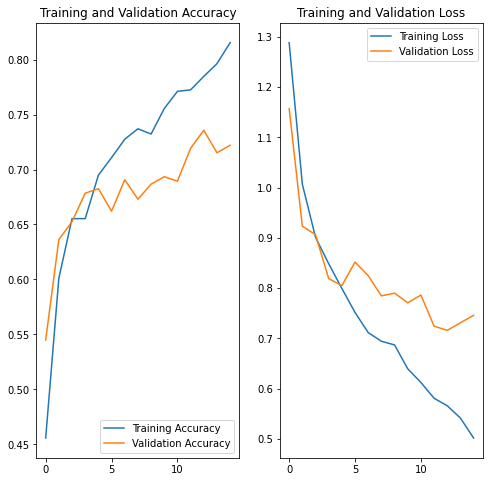

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()